# 1. Libaries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
from sklearn.utils import shuffle

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc, classification_report, plot_confusion_matrix, precision_recall_curve, f1_score
from sklearn.metrics import precision_score, recall_score, auc, accuracy_score

from models.EFM import Ethereum_Fraud_Model
from models.RF import Random_Forest_Model
from models.DBSCAN import DBSCAN_Model
from models.SVM import SVM_Model
from models.LR import Logistic_Regression_Model
from models.GMM import GMM_Model
from models.PCA import PCA_Transformer

from config import *
from utils.cleaner import *

# 2. Data Reading

In [2]:
efm = Ethereum_Fraud_Model()
print(efm.df.shape)
display(efm.df.head())

(9841, 50)


,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
3819,887,0x6594631b7cd57068601bea0e14dd8975b999029b,0,1649.63,6082.43,39692.53,13,3,1,3,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,5.0,None,Bancor
644,645,0x0f884c63695eeb7c49463ac911f3f0c2e78bd89f,0,2988.42,10957.12,148414.97,13,10,0,9,...,474.315159,7474.315159,4982.876773,0.0,0.0,0.0,1.0,1.0,Golem,Golem
8551,890,0x64ebd0467304e04f96520ab73c6e07d40ad25970,1,4561.15,402.40,10329.50,2,3,0,3,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,2.0,,NGOT
5720,2788,0x987022b594a01f934345a60b67ca61c1e2a1cf72,0,0.00,0.00,409.87,1,1,0,1,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0,0
4080,1148,0x6cad6c565167c458579a294152c07db4c507c94a,0,0.00,2139.34,226769.97,0,106,1,3,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,2.0,None,OmiseGO


# 3. Data Exploration

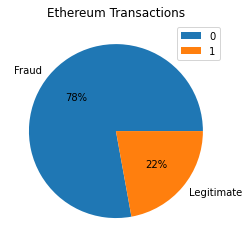

In [3]:
df = efm.df.copy()
flag_counts = df['FLAG'].value_counts()

plt.pie(flag_counts, labels={'Fraud', 'Legitimate'}, autopct='%.0f%%')
plt.title('Ethereum Transactions')
plt.legend(flag_counts.keys().tolist())
plt.show()

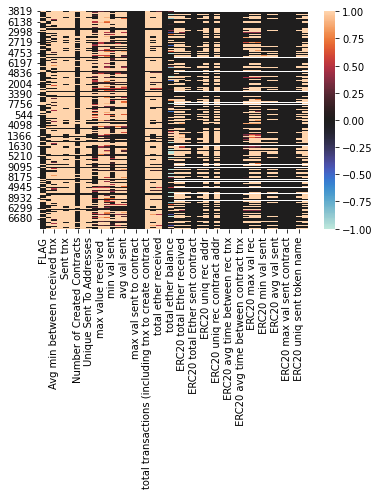

In [4]:
df.drop(efm.filtered_colns, axis=1, inplace=True)
ax = sns.heatmap(df, center=0, vmin=-1, vmax=1)

['total ether sent contracts', ' ERC20 max val rec', ' ERC20 min val sent', ' ERC20 max val sent', ' ERC20 avg val sent', ' ERC20 uniq rec token name']


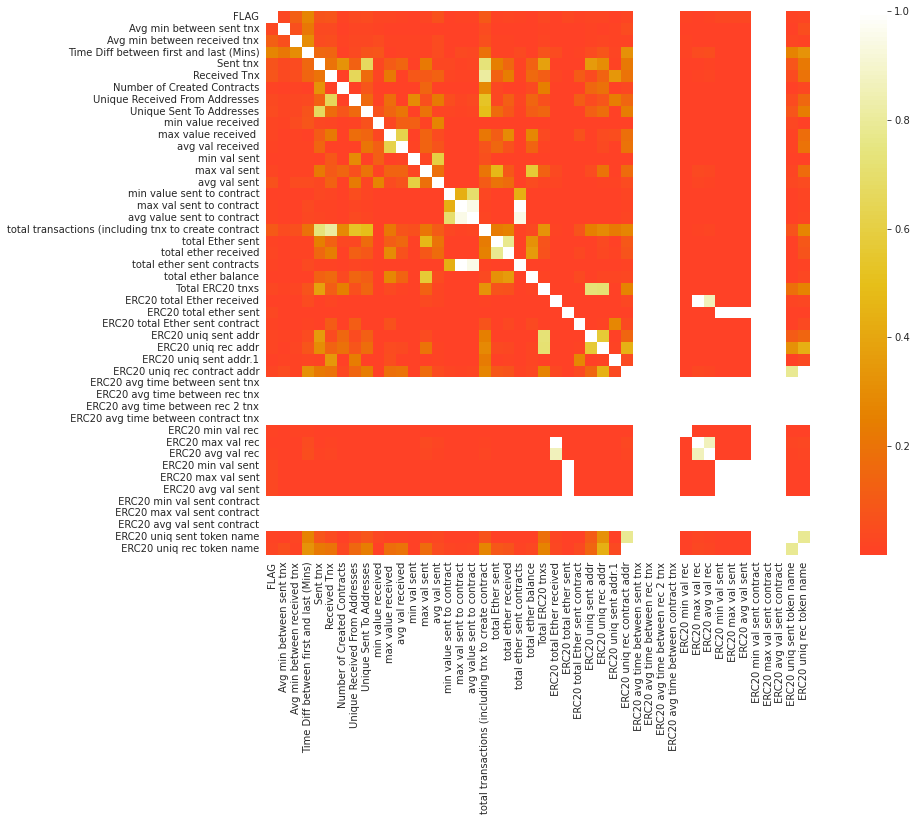

In [5]:
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr_matrix, annot=False, cmap='CMRmap', center=0, square=True)

# Find features with correlation greater than 0.95
corr_colns = [column for column in upper.columns if any(upper[column] > 0.95)]

print(corr_colns)
df.drop(corr_colns, axis=1, inplace=True)

# Add Box Plot Analysis

# 4. Data Cleaning

In [6]:
print_nan_data(df)

FLAG                                                    0.000000
Avg min between sent tnx                                0.000000
Avg min between received tnx                            0.000000
Time Diff between first and last (Mins)                 0.000000
Sent tnx                                                0.000000
Received Tnx                                            0.000000
Number of Created Contracts                             0.000000
Unique Received From Addresses                          0.000000
Unique Sent To Addresses                                0.000000
min value received                                      0.000000
max value received                                      0.000000
avg val received                                        0.000000
min val sent                                            0.000000
max val sent                                            0.000000
avg val sent                                            0.000000
min value sent to contrac

In [7]:
# Drop missing data observations/rows
df_clean = remove_nan_rows(df)
print_nan_data(df_clean)

FLAG                                                    0.0
Avg min between sent tnx                                0.0
Avg min between received tnx                            0.0
Time Diff between first and last (Mins)                 0.0
Sent tnx                                                0.0
Received Tnx                                            0.0
Number of Created Contracts                             0.0
Unique Received From Addresses                          0.0
Unique Sent To Addresses                                0.0
min value received                                      0.0
max value received                                      0.0
avg val received                                        0.0
min val sent                                            0.0
max val sent                                            0.0
avg val sent                                            0.0
min value sent to contract                              0.0
max val sent to contract                

In [8]:
# Drop missing data features/columns
# df_clean = remove_nan_columns(df)

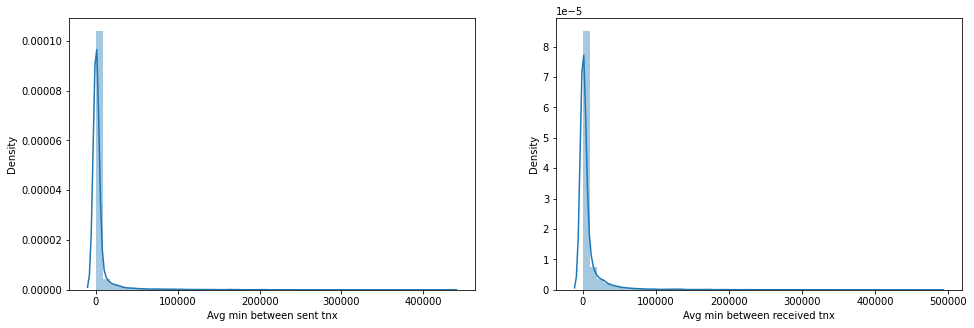

In [52]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Avg min between sent tnx'])
plt.subplot(1,2,2)
sns.distplot(df['Avg min between received tnx'])
plt.show()

<AxesSubplot:xlabel='Avg min between received tnx'>

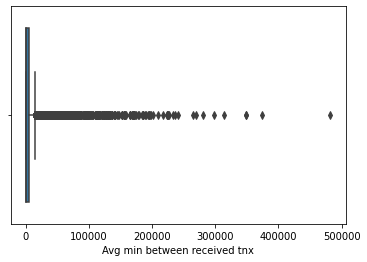

In [54]:
sns.boxplot(df['Avg min between received tnx'])

In [55]:
percentile25 = df['Avg min between received tnx'].quantile(0.25)
percentile75 = df['Avg min between received tnx'].quantile(0.75)

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

df[df['Avg min between received tnx'] > upper_limit]
df[df['Avg min between received tnx'] < lower_limit]

NameError: name 'iqr' is not defined

# 5. Data Preparation

In [15]:
# Normalizae Data
df_norm = df_clean.copy()

# apply normalization techniques
for column in df_norm.columns:
    if column == TARGET_FEATURE:
        continue
    print(column, df_norm[column].max(), df_norm[column].min(), (df_norm[column].max() - df_norm[column].min()))
    df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())

df_norm.dropna(inplace=True, axis=1)
print(df_norm)

Avg min between sent tnx 430287.67 0.0 430287.67
Avg min between received tnx 482175.49 0.0 482175.49
Time Diff between first and last (Mins) 1954860.95 0.0 1954860.95
Sent tnx 10000 0 10000
Received Tnx 10000 0 10000
Number of Created Contracts 9995 0 9995
Unique Received From Addresses 9999 0 9999
Unique Sent To Addresses 9287 0 9287
min value received 10000.0 0.0 10000.0
max value received  800000.0 0.0 800000.0
avg val received 283618.8316 0.0 283618.8316
min val sent 12000.0 0.0 12000.0
max val sent 520000.0 0.0 520000.0
avg val sent 12000.0 0.0 12000.0
min value sent to contract 0.02 0.0 0.02
max val sent to contract 0.046029 0.0 0.046029
avg value sent to contract 0.023014 0.0 0.023014
total transactions (including tnx to create contract 19995 0 19995
total Ether sent 28580960.89 0.0 28580960.89
total ether received 28581590.07 0.0 28581590.07
total ether balance 14288636.26 -15605352.04 29893988.299999997
 Total ERC20 tnxs 10001.0 0.0 10001.0
 ERC20 total Ether received 1000020

In [16]:
display(df_norm)

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 avg val rec,ERC20 uniq sent token name
1428,0,0.001385,1.844826e-02,0.354408,0.0058,0.0074,0.0000,0.0002,0.000215,9.000000e-06,...,4.108938e-12,0.0,0.0,0.0,0.000466,0.0,0.002558,0.000000e+00,1.191586e-10,0.0
6336,0,0.000000,3.137011e-03,0.102910,0.0000,0.0133,0.0001,0.0005,0.000000,0.000000e+00,...,6.766249e-13,0.0,0.0,0.0,0.000466,0.0,0.002558,2.567263e-07,1.962201e-11,0.0
5143,0,0.250796,1.087627e-02,0.118454,0.0002,0.0003,0.0000,0.0003,0.000215,8.588500e-06,...,3.851412e-09,0.0,0.0,0.0,0.001398,0.0,0.007673,0.000000e+00,3.723013e-08,0.0
9226,1,0.000000,0.000000e+00,0.000000,0.0000,0.0000,0.0000,0.0000,0.000000,0.000000e+00,...,1.336973e-12,0.0,0.0,0.0,0.000233,0.0,0.001279,1.350505e-06,7.754406e-11,0.0
1780,0,0.000000,7.099614e-03,0.005253,0.0000,0.0003,0.0001,0.0003,0.000000,1.000000e-04,...,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000e+00,0.000000e+00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6994,0,0.000059,9.332702e-07,0.000039,0.0003,0.0002,0.0000,0.0002,0.000323,1.802305e-03,...,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000e+00,0.000000e+00,0.0
7240,0,0.000041,6.711561e-03,0.206044,0.8436,0.0079,0.0000,0.0005,0.722623,1.000000e-07,...,1.078725e-08,0.0,0.0,0.0,0.001631,0.0,0.010230,0.000000e+00,7.820717e-08,0.0
3126,0,0.000375,1.700626e-06,0.000166,0.0002,0.0002,0.0000,0.0002,0.000215,4.043002e-03,...,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000e+00,0.000000e+00,0.0
6574,0,0.022516,1.025228e-02,0.037526,0.0004,0.0007,0.0000,0.0003,0.000108,1.994660e-05,...,1.513278e-13,0.0,0.0,0.0,0.000233,0.0,0.001279,1.528596e-07,8.776979e-12,0.0


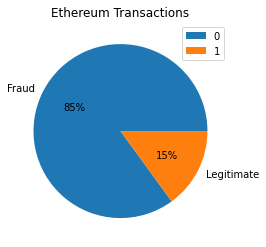

In [17]:
flag_counts = df_norm['FLAG'].value_counts()

plt.pie(flag_counts, labels={'Fraud', 'Legitimate'}, autopct='%.0f%%')
plt.title('Ethereum Transactions')
plt.legend(flag_counts.keys().tolist())
plt.show()

# 6. Sampling (by Pratik)

## Method 1. SMOTE Sampling

In [18]:
from utils.sampling import smote

df_smote = df_norm.copy()

X = df_smote.drop(TARGET_FEATURE, axis=1)
y = df_smote[TARGET_FEATURE]
X_res, y_res = smote(X, y, verbose=True)
df_smote = pd.concat([X_res, y_res], axis=1)
display(df_smote.head())

Original Data Distribution:  Counter({0: 7662, 1: 1350})
Data Distribution After SMOTE:  Counter({0: 7662, 1: 7662})


,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,...,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 avg val rec,ERC20 uniq sent token name,FLAG
0,0.001385,0.018448,0.354408,0.0058,0.0074,0.0000,0.0002,0.000215,0.000009,2.595275e-07,...,0.0,0.0,0.0,0.000466,0.0,0.002558,0.000000e+00,1.191586e-10,0.0,0
1,0.000000,0.003137,0.102910,0.0000,0.0133,0.0001,0.0005,0.000000,0.000000,4.530313e-07,...,0.0,0.0,0.0,0.000466,0.0,0.002558,2.567263e-07,1.962201e-11,0.0,0
2,0.250796,0.010876,0.118454,0.0002,0.0003,0.0000,0.0003,0.000215,0.000009,1.782522e-06,...,0.0,0.0,0.0,0.001398,0.0,0.007673,0.000000e+00,3.723013e-08,0.0,0
3,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.000000,0.000000,0.000000e+00,...,0.0,0.0,0.0,0.000233,0.0,0.001279,1.350505e-06,7.754406e-11,0.0,1
4,0.000000,0.007100,0.005253,0.0000,0.0003,0.0001,0.0003,0.000000,0.000100,4.998199e-06,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000e+00,0.000000e+00,0.0,0


## Method 2. 3-Way cross validation

# 7. Modeling

## Model 1. Supervised: Random Forest (by Akshay)

Model Name:  RandomForest
Highest Accuracy At Depth:  35
Accuracy Score:  0.9862969004893964
AUPRC: 0.9991944799406184
F1 score:  0.9862204724409448 

Accuracy Score:  0.9885807504078303
AUPRC: 0.9993928263468821
F1 score:  0.9887205929745408 

Accuracy Score:  0.9924959216965742
AUPRC: 0.9994001459612307
F1 score:  0.9924713584288052 

Accuracy Score:  0.9905383360522023
AUPRC: 0.9993143294310914
F1 score:  0.9906722418784174 

Accuracy Score:  0.9895561357702349
AUPRC: 0.9996893196211911
F1 score:  0.9894319682959049 



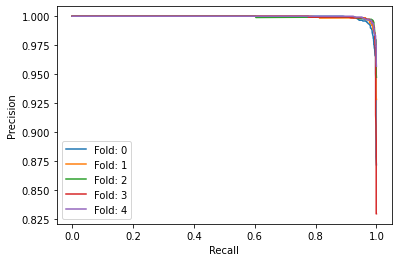

In [19]:
df_rfm = df_smote.copy()
rfm = Random_Forest_Model(df_rfm)
rfm.set_max_depth(100)
efm.add_model(rfm)
efm.run_model(model_name='RandomForest')

## Model 2. Supervised: Logistic Regression

Model Name:  Logistic Regression
Accuracy Score:  0.6763458401305057
AUPRC: 0.7483750947762535
F1 score:  0.7244444444444444 

Accuracy Score:  0.6851549755301795
AUPRC: 0.7592309895845326
F1 score:  0.7352537722908092 

Accuracy Score:  0.6858075040783034
AUPRC: 0.7549419140462396
F1 score:  0.7328710124826631 

Accuracy Score:  0.6920065252854812
AUPRC: 0.7467655963977711
F1 score:  0.7396580253723112 

Accuracy Score:  0.681135770234987
AUPRC: 0.7372357803032903
F1 score:  0.726866088901314 



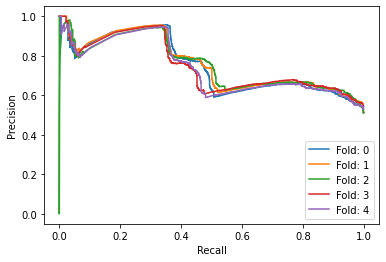

Token Counts f1 score lbfgs:  0.7318186686983085


In [20]:
df_lr = df_smote.copy()
df_lr = shuffle(df_lr)
lr = Logistic_Regression_Model(df_lr)
lr.run()

## Model 3. Supervised: Support Vector Machine (SVM)

Model Name:  SVM
Accuracy: 0.7057096247960848
F1 score: 0.7437499999999999
AUPRC: 0.8179327102715159
Accuracy: 0.7265905383360522
F1 score: 0.7659217877094973
AUPRC: 0.8366505007510886
Accuracy: 0.7187601957585644
F1 score: 0.7556689342403629
AUPRC: 0.8241805572610958
Accuracy: 0.7239804241435562
F1 score: 0.7678375411635564
AUPRC: 0.8603511381544683
Accuracy: 0.7287859007832899
F1 score: 0.7730128380223983
AUPRC: 0.8359340866968384


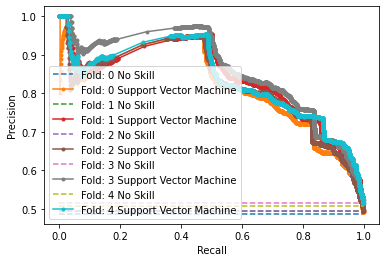

Token Counts f1 score lbfgs:  0.7612382202271629


'\'df_svm = shuffle(df_svm)\nX = df_svm.drop(columns=[TARGET_FEATURE], axis=1)\ny = df_svm[TARGET_FEATURE]\n\nfor count, (train, test) in enumerate(kfold(X, y, 5)):\n    X_train, X_test = X.iloc[train], X.iloc[test]\n    y_train, y_test = y.iloc[train], y.iloc[test]\n    clf = svm.SVC(probability = True)\n    clf.fit(X_train,y_train)\n    y_pred = clf.predict_proba(X_test)\n    y_hat = clf.predict(X_test)\n    # Model Accuracy, how often is the classifier correct?\n    print("Accuracy:", accuracy_score(y_test, y_hat))\n    print("F1 score:", f1_score(y_test, y_hat))\n    fraud_precision, fraud_recall, thresholds = precision_recall_curve(y_test, y_pred[:, 1])\n    print("AUPRC:", auc(fraud_recall, fraud_precision))\n    # plot the precision-recall curves\n    no_skill = len(y_test[y_test==1]) / len(y_test)\n    label = \'Fold: \'+ str(count)\n    plt.plot([0, 1], [no_skill, no_skill], linestyle=\'--\', label=label+\' No Skill\')\n    plt.plot(fraud_recall, fraud_precision, marker=\'.\',

In [31]:
from sklearn import svm

df_svm = df_smote.copy()
svm_model = SVM_Model(df_svm)
svm_model.run()

## Model 3. Unsupervised: GMM (by Pratik)

(9012, 33)
(9012, 33)
-0.24357740266420544
19.19417185915522


"\nprint(gmm_df[feature1].mean())\nprint(gmm_df[feature1].std())\n\nax[0,0].hist(gmm_df[feature1], bins=100)\nax[0,0].set_title(feature1, fontsize=14)\nax[0,0].set_ylabel('Transactions')\n\nax[0,1].hist(gmm_df[feature2], bins=100)\nax[0,1].set_title(feature2, fontsize=14)\nax[0,1].set_ylabel('Transactions')\n\nax[1,0].hist(gmm_df[feature3], bins=100)\nax[1,0].set_title(feature3, fontsize=14)\nax[1,0].set_ylabel('Transactions')\n\nax[1,1].hist(gmm_df[feature4], bins=100)\nax[1,1].set_title(feature4, fontsize=14)\nax[1,1].set_ylabel('Transactions')\n"

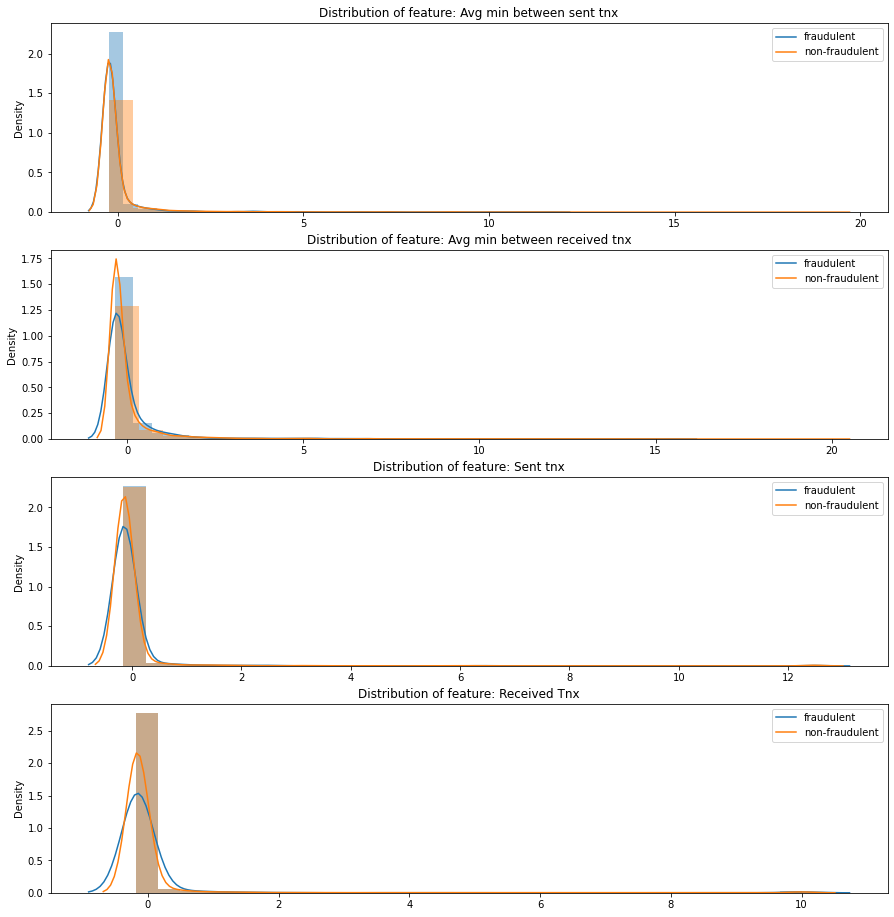

In [51]:
# Trying Standardizing data to get better result with 

from sklearn.preprocessing import StandardScaler
import matplotlib.gridspec as gridspec

gmm_df = df_norm.copy().drop(TARGET_FEATURE, axis=1)

# Standardization
scale= StandardScaler()
gmm_df = pd.DataFrame(scale.fit_transform(gmm_df), columns=gmm_df.columns)
gmm_df[TARGET_FEATURE] = df_norm[TARGET_FEATURE]

print(df_norm.shape)
print(gmm_df.shape)

# fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))

features = ['Avg min between sent tnx', 'Avg min between received tnx', 'Sent tnx', 'Received Tnx']

nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.distplot(gmm_df[feat][df.FLAG==1], bins=30)
    sns.distplot(gmm_df[feat][df.FLAG==0],bins=30)
    ax.legend(['fraudulent', 'non-fraudulent'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

print(gmm_df['Avg min between sent tnx'].min())
print(gmm_df['Avg min between sent tnx'].max())

'''
print(gmm_df[feature1].mean())
print(gmm_df[feature1].std())

ax[0,0].hist(gmm_df[feature1], bins=100)
ax[0,0].set_title(feature1, fontsize=14)
ax[0,0].set_ylabel('Transactions')

ax[0,1].hist(gmm_df[feature2], bins=100)
ax[0,1].set_title(feature2, fontsize=14)
ax[0,1].set_ylabel('Transactions')

ax[1,0].hist(gmm_df[feature3], bins=100)
ax[1,0].set_title(feature3, fontsize=14)
ax[1,0].set_ylabel('Transactions')

ax[1,1].hist(gmm_df[feature4], bins=100)
ax[1,1].set_title(feature4, fontsize=14)
ax[1,1].set_ylabel('Transactions')
'''

In [47]:
# GMM
# df_gmm = df_smote.copy()
gmm_model = GMM_Model(gmm_df)
gmm_model.run(verbose=True)
# efm.add_model(gmm_model)
# efm.run_model(model_name='GMM', verbose=True)

Model Name: GMM


,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,...,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 avg val rec,ERC20 uniq sent token name,FLAG
0,-0.216655,0.024346,1.380772,-0.086637,-0.105788,-0.027442,-0.098358,-0.094816,-0.140383,-0.041949,...,-0.01175,-0.018103,-0.05357,-0.068430,-0.052362,-0.168269,-0.028765,-0.020299,-0.20564,0.0
1,-0.243577,-0.287374,-0.102558,-0.160017,-0.045665,-0.020676,-0.088739,-0.102074,-0.140651,-0.041938,...,-0.01175,-0.018103,-0.05357,-0.068430,-0.052362,-0.168269,-0.028750,-0.020299,-0.20564,0.0
2,4.631335,-0.129812,-0.010876,-0.157486,-0.178139,-0.027442,-0.095151,-0.094816,-0.140396,-0.041859,...,-0.01175,-0.018103,-0.05357,-0.019539,-0.052362,0.063674,-0.028765,-0.020296,-0.20564,0.0
3,-0.243577,-0.351240,-0.709517,-0.160017,-0.181196,-0.027442,-0.104770,-0.102074,-0.140651,-0.041964,...,-0.01175,-0.018103,-0.05357,-0.080653,-0.052362,-0.226255,-0.028685,-0.020299,-0.20564,0.0
4,-0.243577,-0.206700,-0.678532,-0.160017,-0.178139,-0.020676,-0.095151,-0.102074,-0.137677,-0.041670,...,-0.01175,-0.018103,-0.05357,-0.092876,-0.052362,-0.284241,-0.028765,-0.020299,-0.20564,0.0


Components: 1
GMM Score for train set
-18.86585389624733
GMM Score for normal transcation subset in validation set
-45.94924489790358
GMM Score for fraud transcation subset in validation set
-38.232138096622755
0.506344410876133 99
The final threshold selected is:  0.0
Final threshold: 0.000000
Test Recall Score: 1.000
Test Precision Score: 0.339
Test F1 Score: 0.506
tn, fp, fn, tp: [  0 818   0 419]
Components: 2
GMM Score for train set
58.60399795191114
GMM Score for normal transcation subset in validation set
-1221.885239548924
GMM Score for fraud transcation subset in validation set
61.44620666832968
0.16523235800344235 99
The final threshold selected is:  0.0
Final threshold: 0.000000
Test Recall Score: 0.103
Test Precision Score: 0.295
Test F1 Score: 0.152
tn, fp, fn, tp: [715 103 376  43]
Components: 3
GMM Score for train set
84.73028346950726
GMM Score for normal transcation subset in validation set
-116.08634759418669
GMM Score for fraud transcation subset in validation set
68

## Model 4. Unsupervised: DBSCAN (by Pratik)

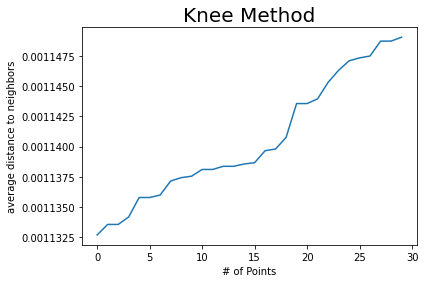

EPS 0.0011381001685537542
Estimated number of clusters: 214
Estimated number of Noise Points: 6662
EPS 0.0011381001685537542
Estimated number of clusters: 214
Estimated number of Noise Points: 6662
EPS 0.001138361974542792
Estimated number of clusters: 214
Estimated number of Noise Points: 6662
EPS 0.001138361974542792
Estimated number of clusters: 214
Estimated number of Noise Points: 6662
EPS 0.001138553570403505
Estimated number of clusters: 214
Estimated number of Noise Points: 6659
EPS 0.0011386614708195563
Estimated number of clusters: 215
Estimated number of Noise Points: 6655
EPS 0.0011396568707737976
Estimated number of clusters: 215
Estimated number of Noise Points: 6653
EPS 0.0011398002116178982
Estimated number of clusters: 215
Estimated number of Noise Points: 6653
EPS 0.0011407605186887926
Estimated number of clusters: 215
Estimated number of Noise Points: 6653
EPS 0.001143575009746082
Estimated number of clusters: 215
Estimated number of Noise Points: 6652
EPS 0.00114357

In [26]:
# DBSCAN Model
df_dbscan = df_smote.copy()
dbscan_model = DBSCAN_Model(df_dbscan)
efm.add_model(dbscan_model)
efm.run_model(model_name='DBSCAN')

# 8. Model Evaluation (by Kenny)

### -------------------- Functions Delarations --------------------

In [ ]:
# Helper: compute corresponding f1-score given thresholds
def compute_f1(y_test, y_pred, thresholds):
    scores = []
    for th in thresholds:
        th_y_pred = y_pred.copy()
        
        th_y_pred[th_y_pred >= th] = 0
        th_y_pred[th_y_pred < th] = 1
        scores.append(f1_score(y_test, th_y_pred))
    return scores


def plot_ROC(y_test, y_pred, plt_config, f1=False):
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    
    scores = []
    if f1:
        scores = compute_f1(y_test, y_pred, thresholds)

    plt.figure(figsize=plt_config['figsize'])
    plt.title('ROC for ' + plt_config['model'])
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    plt.plot([0,1], [0,1], 'y--')
    if f1:
        plt.plot(thresholds, scores, 'r')
    plt.ylabel('True Positive Rate / Score')
    plt.xlabel('False Positive Rate / Threshold')
    plt.legend(['ROC', 'Perfect Classifier', 'F1'])
    plt.show()


def plot_PRC(y_test, y_pred, plt_config, f1=False):
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

    scores = []
    if f1:
        scores = compute_f1(y_test, y_pred, thresholds)

    plt.figure(figsize=plt_config['figsize'])
    plt.title('PRC for ' + plt_config['model'])
    plt.plot(recall, precision, 'b')
    if f1:
        plt.plot(thresholds, scores, 'r')
    plt.ylabel('Precision / Score')
    plt.xlabel('Recall / Threshold')
    plt.legend(['PRC', 'F1'])
    plt.show()


## Metric 1. ROC w/ F1

In [ ]:
# Prepare parameters for ROC

# Uncomment the following when you have data ready

"""
# Get probablistic predictions using a trained model
probs = xgb_c.predict_proba(norm_test_f)
pred = probs[:, 1]

# Customize plot
plt_config = {
    'figsize': (12, 8),
    'model': 'XGB Classifier'
}

# Call the function with your choice of f1 plotting (in the same grapgh)
plot_ROC(y_test, pred, plt_config, f1=True)
"""

## Metric 2. PRC w/ F1

In [ ]:
# Prepare parameters for PRC

# Uncomment the following when you have data ready

"""
# Get probablistic predictions using a trained model
probs = xgb_c.predict_proba(norm_test_f)
pred = probs[:, 1]

# Customize plot
plt_config = {
    'figsize': (12, 8),
    'model': 'XGB Classifier'
}

# Call the function with your choice of f1 plotting (in the same grapgh)
plot_PRC(y_test, pred, plt_config, f1=True)
"""